# Week 10: Document Classification

#### Jimmy Ng & Corey Arnouts

Nov 6, 2020

## 0. Set up

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\myvio\Anaconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## 1. Import data

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df = pd.read_csv(url, sep = ",", header = None)

colNames = [
"word_freq_make", 
"word_freq_address", 
"word_freq_all", 
"word_freq_3d", 
"word_freq_our", 
"word_freq_over", 
"word_freq_remove", 
"word_freq_internet",
"word_freq_order",        
"word_freq_mail",         
"word_freq_receive",      
"word_freq_will",     
"word_freq_people",
"word_freq_report",       
"word_freq_addresses",    
"word_freq_free",       
"word_freq_business",     
"word_freq_email",        
"word_freq_you",         
"word_freq_credit",       
"word_freq_your",         
"word_freq_font",         
"word_freq_000",          
"word_freq_money",        
"word_freq_hp",           
"word_freq_hpl",          
"word_freq_george",       
"word_freq_650",          
"word_freq_lab",          
"word_freq_labs",         
"word_freq_telnet",       
"word_freq_857",          
"word_freq_data",         
"word_freq_415",          
"word_freq_85",           
"word_freq_technology",   
"word_freq_1999",         
"word_freq_parts",        
"word_freq_pm",           
"word_freq_direct",       
"word_freq_cs",           
"word_freq_meeting",      
"word_freq_original",     
"word_freq_project",      
"word_freq_re",           
"word_freq_edu",          
"word_freq_table",        
"word_freq_conference",   
"char_freq_;",            
"char_freq_(",            
"char_freq_[",            
"char_freq_!",            
"char_freq_$",            
"char_freq_#",            
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"spam"
]

df.columns = colNames

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Explore data

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### Let's group by the target column ('spam') and take a quick comparison of each feature. It seems so obvious that they vary across different features. We should be able to build different models and then compare their accuracy. 

In [5]:
pd.set_option('display.max_rows', 500)
df.groupby('spam').agg([np.mean]).unstack()

                                  spam
word_freq_make              mean  0         0.073479
                                  1         0.152339
word_freq_address           mean  0         0.244466
                                  1         0.164650
word_freq_all               mean  0         0.200581
                                  1         0.403795
word_freq_3d                mean  0         0.000886
                                  1         0.164672
word_freq_our               mean  0         0.181040
                                  1         0.513955
word_freq_over              mean  0         0.044544
                                  1         0.174876
word_freq_remove            mean  0         0.009383
                                  1         0.275405
word_freq_internet          mean  0         0.038415
                                  1         0.208141
word_freq_order             mean  0         0.038049
                                  1         0.170061
word_fr

## 3. Split data

In [6]:
# dependent variable 
dv = df['spam']

# independent variables
iv = df.drop('spam', axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iv, dv, test_size = 0.3, stratify = dv)

## 4. Build models

In [8]:
models = []

models.append(('SVM', SVC(gamma = 'scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('DecisionTree', DecisionTreeClassifier()))

In [9]:
seed = 1234
kfolds = 10

for name, model in models:
    kfold = KFold(n_splits = kfolds, random_state = seed, shuffle = True)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')    
    output = "%s: %f"%(name, cv_result.mean())
    print(output)

SVM: 0.715839
KNN: 0.795031
Naive Bayes: 0.814596
DecisionTree: 0.905590


## 5. Decision tree

It seems that the decision tree classification algorithm outperformed the others in this case. Let's take a deeper dive of this classifier and look at various features that stand out for identifying spam. 

In [10]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (test set): ", metrics.accuracy_score(y_test, y_pred))

Accuracy (test set):  0.9167270094134685


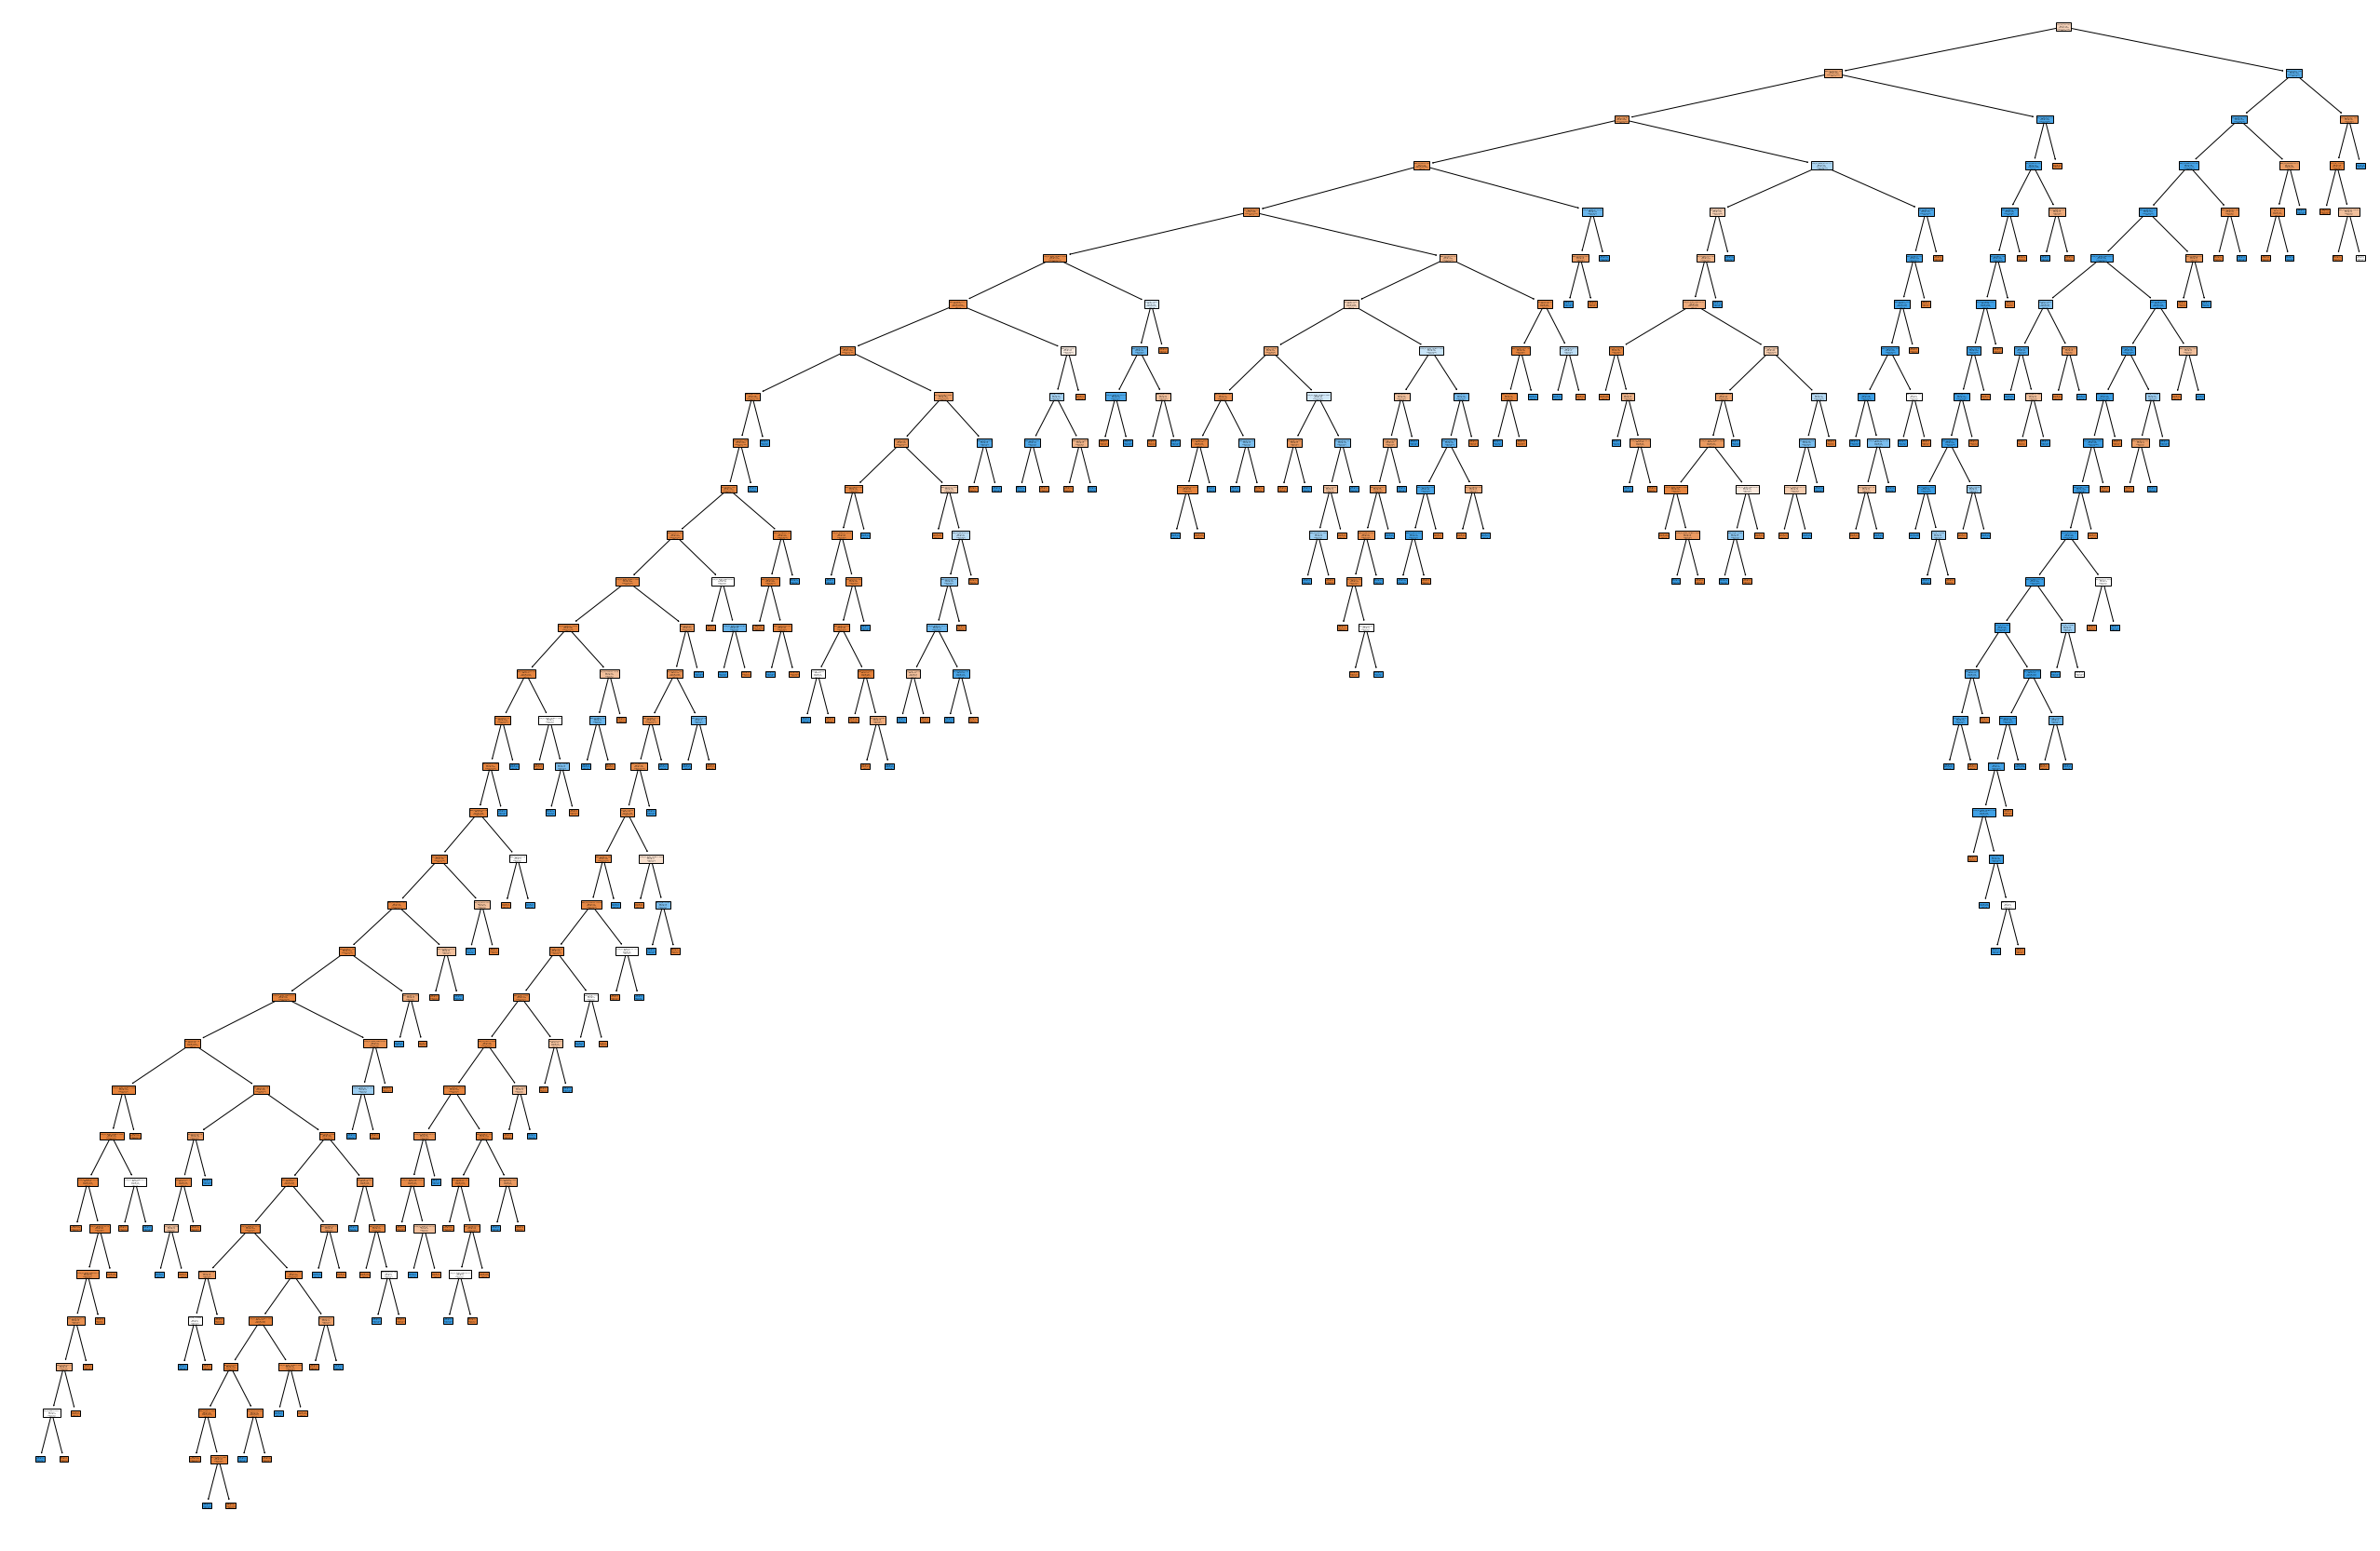

In [11]:
fig = plt.figure(figsize = (45, 30))
_ = tree.plot_tree(clf, 
                   feature_names = iv.columns.tolist(),  
                   class_names = 'spam',
                   filled = True)

#### text representation

In [12]:
text_representation = tree.export_text(clf, feature_names = iv.columns.tolist())
print(text_representation)

|--- char_freq_$ <= 0.04
|   |--- word_freq_remove <= 0.03
|   |   |--- char_freq_! <= 0.46
|   |   |   |--- word_freq_000 <= 0.32
|   |   |   |   |--- word_freq_free <= 0.02
|   |   |   |   |   |--- capital_run_length_average <= 8.20
|   |   |   |   |   |   |--- word_freq_money <= 0.27
|   |   |   |   |   |   |   |--- word_freq_our <= 0.71
|   |   |   |   |   |   |   |   |--- word_freq_will <= 5.97
|   |   |   |   |   |   |   |   |   |--- word_freq_3d <= 0.36
|   |   |   |   |   |   |   |   |   |   |--- word_freq_hp <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |   |   |   |   |   |   |--- word_freq_hp >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- word_freq_3d >  0.36
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- word_freq_will >  5.97
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 